<a href="https://colab.research.google.com/github/aschauhan241/git_test/blob/main/BDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 40 kB/s 
     |████████████████████████████████| 199 kB 50.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=5625c7329cc42acf49c17808e3e8ae009b642717e46c012073521cf6ad39b308
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("walmart").getOrCreate()

In [6]:
df = spark.read.csv('/content/drive/MyDrive/BDA projecy/WMT.csv',header=True,inferSchema=True)

In [7]:
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [8]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [9]:
#Print out the first 5 columns.

df.head(5)

[Row(Date=datetime.datetime(1972, 8, 25, 0, 0), Open=0.063477, High=0.064697, Low=0.063477, Close=0.064453, Adj Close=0.036447, Volume=2508800),
 Row(Date=datetime.datetime(1972, 8, 28, 0, 0), Open=0.064453, High=0.064941, Low=0.064209, Close=0.064209, Adj Close=0.036309, Volume=972800),
 Row(Date=datetime.datetime(1972, 8, 29, 0, 0), Open=0.063965, High=0.063965, Low=0.063477, Close=0.063477, Adj Close=0.035895, Volume=1945600),
 Row(Date=datetime.datetime(1972, 8, 30, 0, 0), Open=0.063477, High=0.063477, Low=0.062988, Close=0.063477, Adj Close=0.035895, Volume=409600),
 Row(Date=datetime.datetime(1972, 8, 31, 0, 0), Open=0.062988, High=0.062988, Low=0.0625, Close=0.0625, Adj Close=0.035343, Volume=870400)]

In [10]:
df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+-----------------+
|summary|             Open|              High|               Low|             Close|         Adj Close|           Volume|
+-------+-----------------+------------------+------------------+------------------+------------------+-----------------+
|  count|            12491|             12491|             12491|             12491|             12491|            12491|
|   mean|35.47919765615241|35.811310182371315|35.151301605716114| 35.48537980233778|28.948680092146382|7540559.743735489|
| stddev|37.20707114804321| 37.51941889361142| 36.91418633394463|37.214409106712566|34.585374876991864|6237161.700819969|
|    min|         0.015625|          0.015625|          0.014404|          0.015625|          0.008889|                0|
|    max|       153.600006|        153.660004|        151.660004|        152.789993|        150.842651|        131833600|
+-------+---------------

In [11]:
df.describe().printSchema()

root
 |-- summary: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Volume: string (nullable = true)



In [12]:
from pyspark.sql.functions import format_number

In [13]:
result = df.describe()
result.select(result['summary'],
              format_number(result['Open'].cast('float'),2).alias('Open'),
              format_number(result['High'].cast('float'),2).alias('High'),
              format_number(result['Low'].cast('float'),2).alias('Low'),
              format_number(result['Close'].cast('float'),2).alias('Close'),
              result['Volume'].cast('int').alias('Volume')
             ).show()

+-------+---------+---------+---------+---------+---------+
|summary|     Open|     High|      Low|    Close|   Volume|
+-------+---------+---------+---------+---------+---------+
|  count|12,491.00|12,491.00|12,491.00|12,491.00|    12491|
|   mean|    35.48|    35.81|    35.15|    35.49|  7540559|
| stddev|    37.21|    37.52|    36.91|    37.21|  6237161|
|    min|     0.02|     0.02|     0.01|     0.02|        0|
|    max|   153.60|   153.66|   151.66|   152.79|131833600|
+-------+---------+---------+---------+---------+---------+



In [14]:
#Create a new dataframe with a column called HV Ratio that is the ratio of the 
#High Price versus volume of stock traded for a day.


df2 = df.withColumn("HV Ratio",df["High"]/df["Volume"])#.show()
# df2.show()
df2.select('HV Ratio').show()

+--------------------+
|            HV Ratio|
+--------------------+
|2.578802614795918...|
|6.675678453947369E-8|
|3.287674753289473E-8|
|1.549731445312500...|
|7.236672794117647E-8|
|       2.46046875E-7|
|1.118394886363636...|
|       2.46046875E-7|
|5.348845108695652...|
|9.390024038461538E-8|
|6.808159722222221E-8|
|1.021223958333333...|
|4.084895833333333E-7|
|             4.94E-8|
|      1.230234375E-7|
|5.880952380952380...|
|2.008965163934426E-8|
|1.211171874999999...|
|    4.29150390625E-8|
|6.872012867647059E-8|
+--------------------+
only showing top 20 rows



In [15]:
# What day had the Peak High in Price?
df.orderBy(df["High"].desc()).head(1)[0][0]

datetime.datetime(2020, 12, 1, 0, 0)

In [16]:
# What is the mean of the Close column?
from pyspark.sql.functions import mean
df.select(mean("Close")).show()

+-----------------+
|       avg(Close)|
+-----------------+
|35.48537980233778|
+-----------------+



In [17]:
# What is the max and min of the Volume column?
from pyspark.sql.functions import max,min
df.select(max("Volume"),min("Volume")).show()

+-----------+-----------+
|max(Volume)|min(Volume)|
+-----------+-----------+
|  131833600|          0|
+-----------+-----------+



In [18]:
#What is the max High per year?
from pyspark.sql.functions import year
yeardf = df.withColumn("Year",year(df["Date"]))
max_df = yeardf.groupBy('Year').max()
max_df.select('Year','max(High)').show()

+----+----------+
|Year| max(High)|
+----+----------+
|1990|    9.1875|
|1975|  0.061523|
|1977|  0.080078|
|2003| 60.200001|
|2007| 51.439999|
|2018|109.980003|
|1974|  0.040039|
|2015| 90.970001|
|2006| 52.150002|
|1978|  0.114746|
|2022|146.630005|
|2013| 81.370003|
|1988|  4.234375|
|1997|  20.96875|
|1994|    14.625|
|2014| 88.089996|
|1973|  0.068115|
|1979|  0.143555|
|2019|125.379997|
|2004| 61.310001|
+----+----------+
only showing top 20 rows



In [20]:
# What is the average Close for each Calendar Month?
#In other words, across all the years, what is the average Close price for Jan,Feb, Mar, etc...
 #Your result will have a value for each of these months.

from pyspark.sql.functions import month
monthdf = df.withColumn("Month",month("Date"))
monthavgs = monthdf.select("Month","Close").groupBy("Month").mean()
monthavgs.select("Month","avg(Close)").orderBy('Month').show()

+-----+------------------+
|Month|        avg(Close)|
+-----+------------------+
|    1| 35.66998774855494|
|    2|36.259627149269285|
|    3| 34.80272272727273|
|    4| 35.16701819447185|
|    5| 34.66763651447876|
|    6| 34.97434812786258|
|    7| 35.73718895173742|
|    8| 35.36014060733945|
|    9| 35.04383120492605|
|   10| 35.25492305877033|
|   11| 36.44846344062804|
|   12| 36.53386848481972|
+-----+------------------+



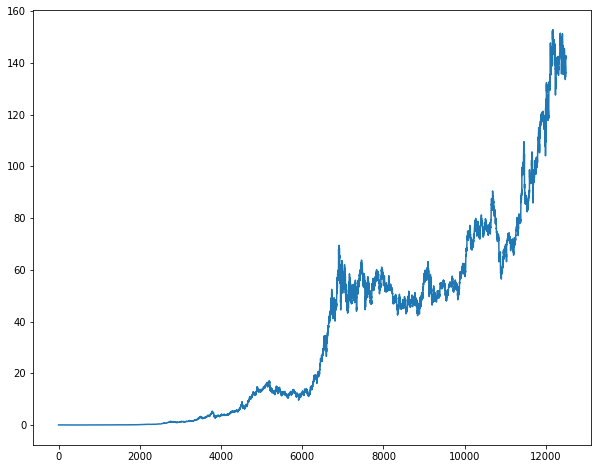

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BDA projecy/WMT.csv')
plt.figure(figsize= (10,8))
df['Close'].plot()
plt.show()

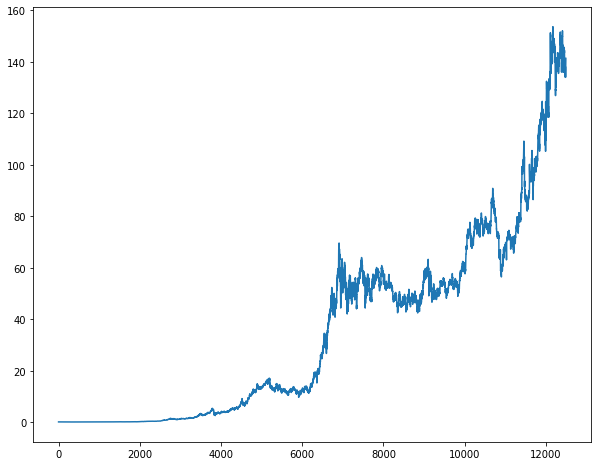

In [25]:
plt.figure(figsize= (10,8))
df['Open'].plot()
plt.show()